Initial Imports

In [1]:
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

Routing Two Devices Using Our Modified A* Routing Algorithm

2024-04-25 00:45:14.683 | INFO     | gdsfactory.pdk:activate:309 - 'generic' PDK is now active
waypoints [[ 15.5   0. ]
 [135.5   0. ]
 [135.5  81. ]
 [125.5  81. ]]


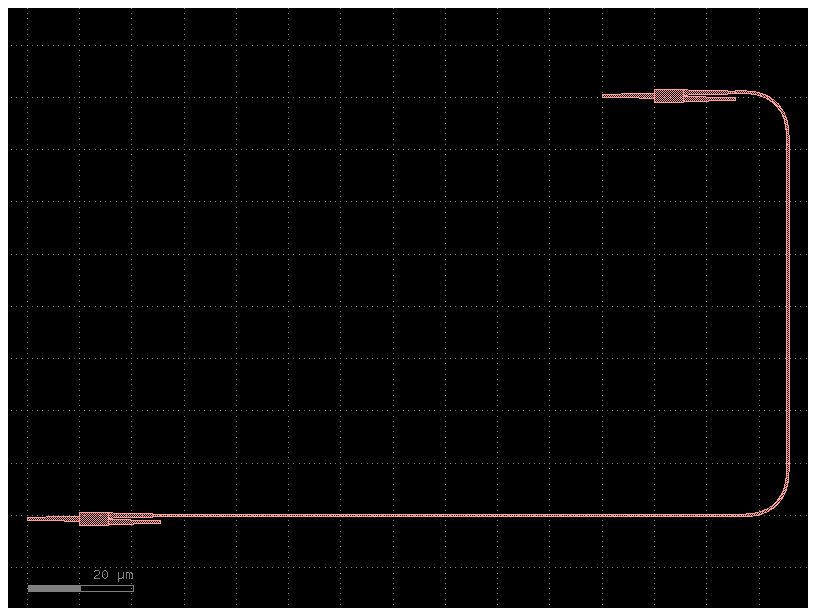

In [2]:
gf.config.rich_output()

#create new component with two devices
c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
mmi1.move((0, -0.625)) #move device 1
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375)) #move device 2

#route their second ports (o2) to each other
route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
c.add(route.references)
c.plot()

Routing Again With Obstacle On the Side

waypoints [[ 10.     10.   ]
 [ 90.     10.   ]
 [ 90.     80.3  ]
 [100.     80.375]]


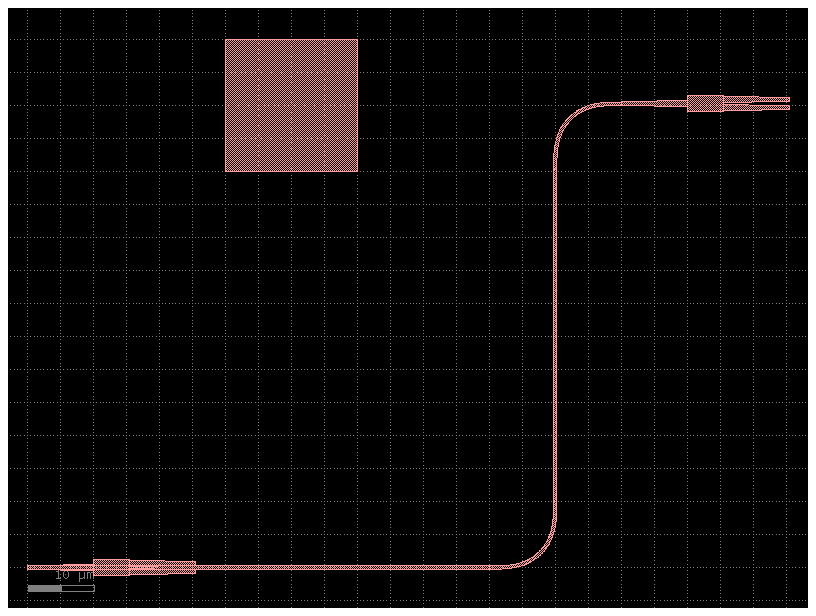

In [5]:
# Test Routing
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
#mmi1.move((0, -0.625))
mmi1.move((20, 10))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

rec2 = gf.Component("rectangle_polygon")
rec2.add_polygon(
       [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
   )
x = c << rec2
# x.move((130, 20))
x.move((50, 80))

# route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
route = gf.routing.get_route(mmi1.ports["o1"], mmi2.ports["o1"], component=c, component_margin=5)
c.add(route.references)
c.plot()

Routing Around A Direct Obstacle

waypoints [[ 15.5   0. ]
 [135.5   0. ]
 [135.5  81. ]
 [125.5  81. ]]


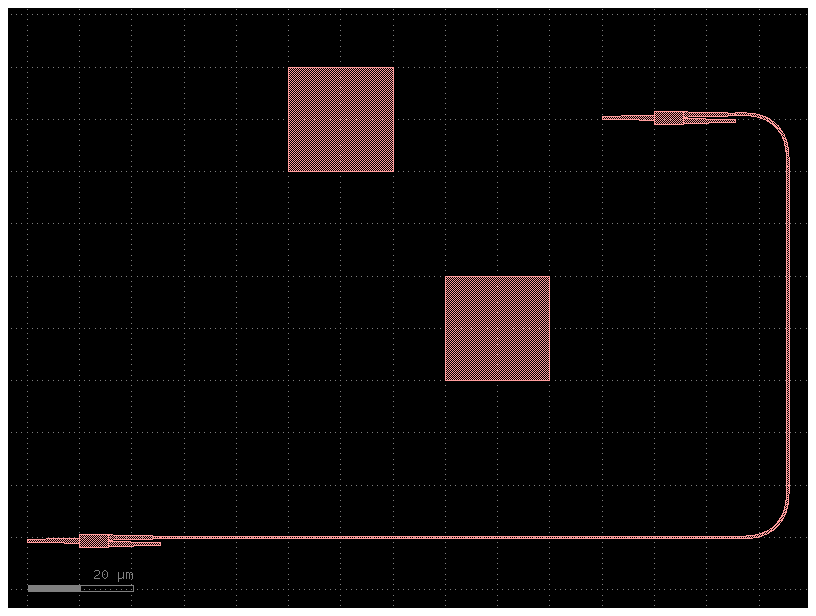

In [11]:
gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
mmi1.move((0, -0.625))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

rec2 = gf.Component("rectangle_polygon")
rec2.add_polygon(
       [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
   )
x = c << rec2
# x.move((130, 20))
x.move((50, 80))

rec3 = gf.Component("rectangle_polygon")
rec3.add_polygon(
       [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
   )
x = c << rec3
# x.move((130, 20))
x.move((80, 40))

route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
c.add(route.references)
c.plot()

Routing Using Optional Flag to Route Around Device Bodies

waypoints [[ 10.   10. ]
 [  5.   10. ]
 [  5.   74.6]
 [135.5  74.6]
 [135.5  81. ]
 [125.5  81. ]]


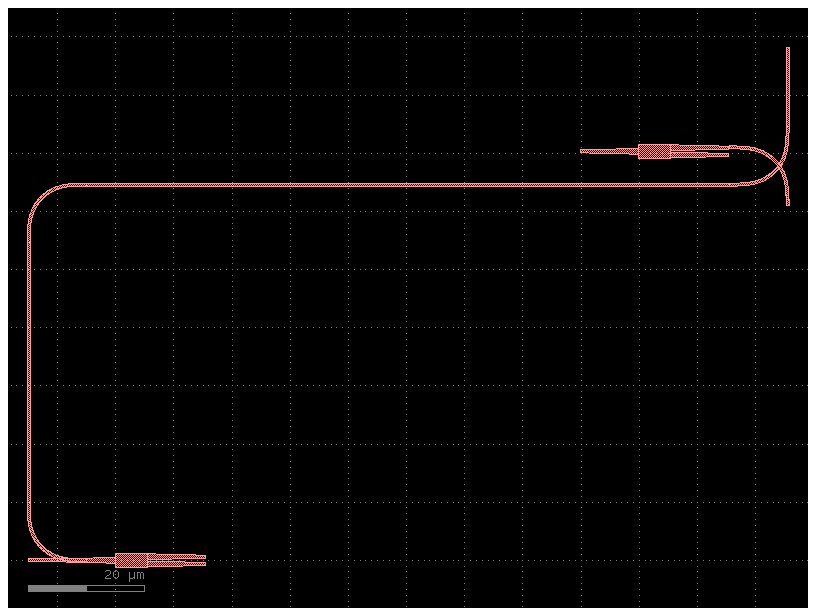

In [4]:
gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
#mmi1.move((0, -0.625)) #must move device to non-negative coordinates to allow for routing here
mmi1.move((20, 10))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

route = gf.routing.get_route(mmi1.ports["o1"], mmi2.ports["o2"], component=c, component_margin=5, avoid_device_bodies=True)
c.add(route.references)
c.plot()